In [ ]:
#Install Tensorflow
import tensorflow as tf
print(tf.__version__)

2.17.1


In [ ]:
# Load in the data
mnist =tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train,x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:",x_train.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),  # Giriş boyutunu burada tanımlayın
    tf.keras.layers.Flatten(),  # Artık input_shape belirtmeye gerek yok
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])


In [ ]:
#Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Train the model
r=model.fit(x_train,y_train,validation_data=(x_test,y_test),
            epochs=10,
            batch_size=32)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8584 - loss: 0.4835 - val_accuracy: 0.9577 - val_loss: 0.1383
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9536 - loss: 0.1521 - val_accuracy: 0.9693 - val_loss: 0.0989
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9665 - loss: 0.1076 - val_accuracy: 0.9736 - val_loss: 0.0848
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9718 - loss: 0.0902 - val_accuracy: 0.9753 - val_loss: 0.0803
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9770 - loss: 0.0762 - val_accuracy: 0.9754 - val_loss: 0.0790
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9794 - loss: 0.0659 - val_accuracy: 0.9800 - val_loss: 0.0730
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9814 - loss: 0.0553 - val_accuracy: 0.9794 - val_loss: 0.0697
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9846 - loss: 0.0489 

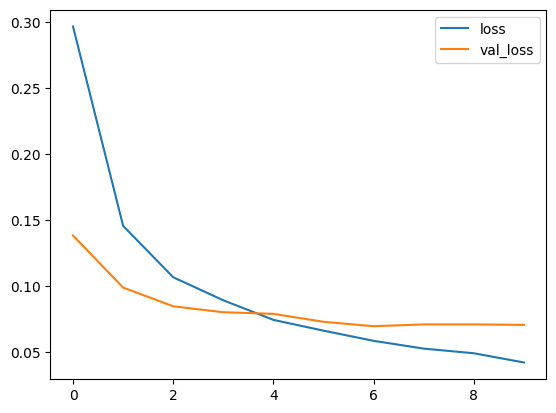

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

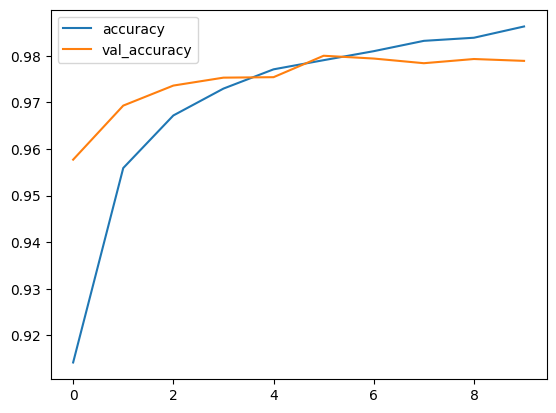

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label='val_accuracy')
plt.legend()

In [ ]:
#Evaluate the model
print(model.evaluate(x_test,y_test))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9741 - loss: 0.0846
[0.07069432735443115, 0.9789000153541565]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion matrix,withoud normlization
[[ 971    1    2    0    0    0    3    1    2    0]
 [   0 1123    3    1    0    1    2    1    4    0]
 [   0    0 1013    5    0    0    2    4    8    0]
 [   0    0    1  996    0    3    0    5    3    2]
 [   1    1    3    0  947    0    4    4    3   19]
 [   2    0    0    9    1  872    2    0    6    0]
 [   5    2    1    1    4    5  935    0    5    0]
 [   0    5   10    4    0    0    0  999    3    7]
 [   3    0    4    5    2    1    1    2  950    6]
 [   1    3    0    7    4    4    0    7    0  983]]


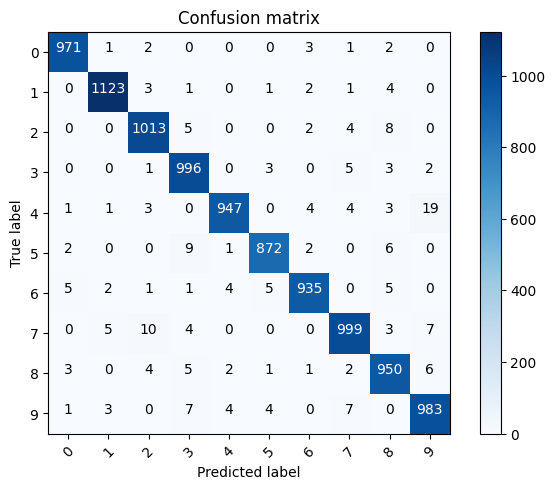

In [ ]:
#Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm,classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
#This function prints and plots the confusion matrix
#Normalization can be appliedby setting 'normalize=True'
  if normalize:
    cm=cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix,withoud normlization")

  print(cm)

  plt.imshow(cm,interpolation='nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks,classes,rotation=45)
  plt.yticks(tick_marks,classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i,format(cm[i,j],fmt),
             horizontalalignment="center",
             color="white"if cm[i,j]> thresh else 'black'),

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test =model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test,p_test)
plot_confusion_matrix(cm,list(range(10)))

#Do these results make sense?
#It's easy to confuse 9<-->4, 9<--7, 2<-->7, etc.

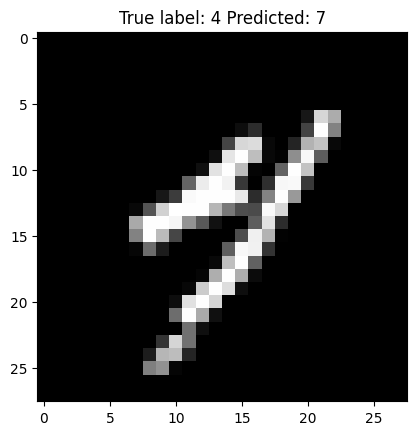

In [ ]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i],cmap='gray')
plt.title('True label: %s Predicted: %s'%(y_test[i],p_test[i]));

---


In [ ]:
mnist = tf.keras.datasets.mnist  # MNIST veri setini Keras'tan yüklemek için çağırıyoruz.


NIST, el yazısı rakamlar içeren standart bir veri setidir (28x28 boyutunda, 0-9 arası rakamlar).

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()  # Eğitim ve test verilerini yükler.
x_train, x_test = x_train / 255.0, x_test / 255.0  # Veriyi [0, 1] aralığına ölçekler (normalizasyon).
print("x_train.shape:", x_train.shape)  # Eğitim verisinin boyutunu ekrana yazdırır.


x_train ve x_test: Giriş verisi (28x28 piksel matris).
y_train ve y_test: Etiketler (0-9 arası rakamlar).

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  # 28x28 matrisini düzleştirerek (784 boyutlu vektör) giriş olarak alır.
    tf.keras.layers.Dense(128, activation='relu'),  # 128 nöronlu tam bağlı katman (ReLU aktivasyonu ile).
    tf.keras.layers.Dropout(0.2),  # Aşırı öğrenmeyi önlemek için %20 Dropout uygular.
    tf.keras.layers.Dense(10, activation='softmax')  # 10 sınıflı çıkış katmanı (olasılık dağılımı döndürür).
])


Sequential API: Katmanların sıralı bir yapıda eklenmesi.
Dropout: Aşırı öğrenmeyi önlemek için bazı nöronları rastgele devre dışı bırakır.
Softmax Aktivasyonu: Çıkış sınıflarının olasılıklarını döndürür.

In [ ]:
model.compile(
    optimizer='adam',  # Modern bir optimizasyon algoritması (Adam).
    loss='sparse_categorical_crossentropy',  # İkili olmayan sınıflar için kayıp fonksiyonu.
    metrics=['accuracy']  # Doğruluk metriğini kullanır.
)


Kayıp Fonksiyonu: Modelin tahminleriyle gerçek değerler arasındaki farkı ölçer.
Adam Optimizer: Gradyan inişi hızlandırır ve uyarlamalı öğrenme oranı sağlar.

In [ ]:
r = model.fit(
    x_train, y_train,  # Eğitim verisi ve etiketleri.
    validation_data=(x_test, y_test),  # Doğrulama verisi ve etiketleri.
    epochs=10,  # Model 10 kez eğitim verisi üzerinde döner.
    batch_size=32  # Her minibatch için 32 örnek kullanılır.
)


Validation Data: Modelin doğrulama performansını test etmek için kullanılır.
Epoch: Tüm veri seti üzerinde yapılan bir tam eğitim döngüsü.

In [ ]:
plt.plot(r.history['loss'], label='loss')  # Eğitim kayıplarını çizer.
plt.plot(r.history['val_loss'], label='val_loss')  # Doğrulama kayıplarını çizer.
plt.legend()


Eğitim sırasında kayıp değerlerinin nasıl değiştiğini gösterir.

In [ ]:
plt.plot(r.history['accuracy'], label='accuracy')  # Eğitim doğruluklarını çizer.
plt.plot(r.history['val_accuracy'], label='val_accuracy')  # Doğrulama doğruluklarını çizer.
plt.legend()


Modelin doğruluk metriklerinin değişimini görselleştirir.

In [ ]:
print(model.evaluate(x_test, y_test))  # Test setinde kayıp ve doğruluk değerlerini yazdırır.


Modelin genelleme performansını ölçer.

In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)  # Confusion matrix görselleştirir.
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)  # Sınıf etiketlerini x eksenine ekler.
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)  # Tahmin edilen sınıfları alır.
cm = confusion_matrix(y_test, p_test)  # Confusion matrix oluşturur.
plot_confusion_matrix(cm, list(range(10)))  # Confusion matrix'i çizdirir.


Confusion Matrix: Gerçek ve tahmin edilen sınıflar arasındaki ilişkiyi görselleştirir.
Sınıflar arasında sık karıştırılan rakamları (ör. 9 ile 4) analiz etmek için faydalıdır.

In [ ]:
misclassified_idx = np.where(p_test != y_test)[0]  # Yanlış sınıflandırılmış örneklerin indeksleri.
i = np.random.choice(misclassified_idx)  # Rastgele bir yanlış sınıflandırılmış örnek seçer.
plt.imshow(x_test[i], cmap='gray')  # Yanlış sınıflandırılmış örneğin görüntüsünü çizer.
plt.title('True label: %s Predicted: %s' % (y_test[i], p_test[i]))  # Gerçek ve tahmin edilen etiketi gösterir.


Yanlış sınıflandırılmış örneklerin hangi sınıflar arasında karıştırıldığını analiz etmek için kullanılır.

Özet Halde Kod ve Açıklamalar:

Veri Yükleme: MNIST veri setini yükleyin ve ölçeklendirin.

Model: Sequential model ile 2 Dense katmanlı ağ tanımlayın.

Derleme: Adam optimizer ve sparse_categorical_crossentropy kayıp fonksiyonu kullanın.

Eğitim: Modeli fit metodu ile eğitin.
Görselleştirme: Eğitim sırasında doğruluk ve kayıpları çizdirin.

Confusion Matrix: Tahminler ile gerçek etiketler arasındaki ilişkiyi analiz edin.

Yanlış Sınıflar: Yanlış sınıflandırılan örnekleri görselleştirin.